In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from spectrum import FourierSpectrum

In [2]:
DIR = './data/20m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww20 = []
u20 = []
v20 = []
tt20 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/20m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww20.append(df[di]["w' (m/s)"].dropna())
        tt20.append(df[di]["t' (C)"].dropna())
        u20.append(df[di].iloc[:, 1].dropna())
        v20.append(df[di].iloc[:, 2].dropna())

In [3]:
DIR = './data/3m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww3 = []
u3 = []
v3 = []
tt3 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/3m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww3.append(df[di]["w' (m/s)"].dropna())
        tt3.append(df[di]["t' (C)"].dropna())
        u3.append(df[di].iloc[:, 1].dropna())
        v3.append(df[di].iloc[:, 2].dropna())

In [4]:
DIR = './data/10m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'West']

ww10 = []
u10 = []
v10 = []
tt10 = []
for fi in range(4):
    xls = pd.ExcelFile(f'./data/10m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww10.append(df[di]["w' (m/s)"].dropna())
        tt10.append(df[di]["t' (C)"].dropna())
        u10.append(df[di].iloc[:, 1].dropna())
        v10.append(df[di].iloc[:, 2].dropna())

In [46]:
def plot20(ax, ww, tt, Yadjust):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    Y1 = (np.array(f) ** (-7/3)) / Yadjust
    Y2 = (np.array(f) ** (-5/3)) / Yadjust
    ax.loglog(f, np.abs(Pxy), 'b-', f, Y1, 'r--', f, Y2, 'm--')
    ax.set_ylim(10**(-7), 1)
def plot3(ax, ww, tt):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    ax.loglog(f, np.abs(Pxy), 'g-')
    ax.set_ylim(10**(-7), 1)
def plot10(ax, ww, tt):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    ax.loglog(f, np.abs(Pxy), 'cyan')
    ax.set_ylim(10**(-7), 1)

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, ww3[ti*3+pi], tt3[ti*3+pi])        
        if ti < 3:
            plot10(ax, ww10[ti*3+pi], tt10[ti*3+pi])
        elif ti > 3:
            plot10(ax, ww10[(ti-1)*3+pi], tt10[(ti-1)*3+pi])
        plot20(ax, ww20[ti*3+pi], tt20[ti*3+pi], 1000)
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Cross Power Spectrum of w' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/Cospectra_wt.png', bbox_inches='tight')

In [45]:
# def plot20(ax, ww, tt, Yadjust):
#     wfft = np.fft.fft(ww) / len(ww)
#     tfft = np.fft.fft(tt) / len(tt)
#     G = wfft.conjugate() * tfft
#     Co = G.real
#     f = np.fft.fftfreq(len(ww))
#     Y1 = (np.array(f) ** (-7/3)) / Yadjust
#     Y2 = (np.array(f) ** (-5/3)) / Yadjust
#     ax.loglog(f, abs(Co), 'b-', f, Y1, 'r--', f, Y2, 'm--')
#     ax.set_ylim(10**(-7), 1)
# def plot3(ax, ww, tt):
#     wfft = np.fft.fft(ww) / len(ww)
#     tfft = np.fft.fft(tt) / len(tt)
#     G = wfft.conjugate() * tfft
#     Co = G.real
#     f = np.fft.fftfreq(len(ww))
#     ax.loglog(f, abs(Co), 'g-')
#     ax.set_ylim(10**(-7), 1)
# def plot10(ax, ww, tt):
#     wfft = np.fft.fft(ww) / len(ww)
#     tfft = np.fft.fft(tt) / len(tt)
#     G = wfft.conjugate() * tfft
#     Co = G.real
#     f = np.fft.fftfreq(len(ww))
#     ax.loglog(f, abs(Co), 'cyan')
#     ax.set_ylim(10**(-7), 1)

In [11]:
# semilog plot
def plot20(ax, ww, tt, yl, yr):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    ax.semilogx(f, np.abs(Pxy), 'b-')
    ax.set_ylim(yl, yr)
    ax.set_xlim(.01, 1)
def plot3(ax, ww, tt, yl, yr):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    ax.semilogx(f, np.abs(Pxy), 'g-')
    ax.set_ylim(yl, yr)
def plot10(ax, ww, tt, yl, yr):
    f, Pxy = signal.csd(ww, tt, fs=10, scaling='spectrum')
    ax.semilogx(f, np.abs(Pxy), 'cyan')
    ax.set_ylim(yl, yr)

In [13]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
yl = [-.01, -.05, -.005]
yr = [.17, .8, .07]
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, ww3[ti*3+pi], tt3[ti*3+pi], yl[pi], yr[pi])        
        if ti < 3:
            plot10(ax, ww10[ti*3+pi], tt10[ti*3+pi], yl[pi], yr[pi])
        elif ti > 3:
            plot10(ax, ww10[(ti-1)*3+pi], tt10[(ti-1)*3+pi], yl[pi], yr[pi])
        plot20(ax, ww20[ti*3+pi], tt20[ti*3+pi], yl[pi], yr[pi])
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Semilog plot of Cross Power Spectrum of w' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/SemiCospectra_wt.png', bbox_inches='tight')
plt.close()

In [14]:
def uuvv(df):
    if df.iloc[-4] == 'Mean':
        return df.iloc[:-4] - df.iloc[:-4].mean()
    else:
        return df - df.mean()
uu3 = [uuvv(u3[i]) for i in range(15)]
uu10 = [uuvv(u10[i]) for i in range(12)]
uu20 = [uuvv(u20[i]) for i in range(15)]
vv3 = [uuvv(v3[i]) for i in range(15)]
vv10 = [uuvv(v10[i]) for i in range(12)]
vv20 = [uuvv(v20[i]) for i in range(15)]

In [52]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, uu3[ti*3+pi], tt3[ti*3+pi])        
        if ti < 3:
            plot10(ax, uu10[ti*3+pi], tt10[ti*3+pi])
        elif ti > 3:
            plot10(ax, uu10[(ti-1)*3+pi], tt10[(ti-1)*3+pi])
        plot20(ax, uu20[ti*3+pi], tt20[ti*3+pi], 1000)
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Cross Power Spectrum of u' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/Cospectra_ut.png', bbox_inches='tight')

In [53]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, vv3[ti*3+pi], tt3[ti*3+pi])        
        if ti < 3:
            plot10(ax, vv10[ti*3+pi], tt10[ti*3+pi])
        elif ti > 3:
            plot10(ax, vv10[(ti-1)*3+pi], tt10[(ti-1)*3+pi])
        plot20(ax, vv20[ti*3+pi], tt20[ti*3+pi], 1000)
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Cross Power Spectrum of v' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/Cospectra_vt.png', bbox_inches='tight')

In [16]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
yl = [-.01, -.05, -.005]
yr = [.12, .3, .06]
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, uu3[ti*3+pi], tt3[ti*3+pi], yl[pi], yr[pi])        
        if ti < 3:
            plot10(ax, uu10[ti*3+pi], tt10[ti*3+pi], yl[pi], yr[pi])
        elif ti > 3:
            plot10(ax, uu10[(ti-1)*3+pi], tt10[(ti-1)*3+pi], yl[pi], yr[pi])
        plot20(ax, uu20[ti*3+pi], tt20[ti*3+pi], yl[pi], yr[pi])
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Semilog plot of Cross Power Spectrum of u' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/SemiCospectra_ut.png', bbox_inches='tight')
plt.close()

In [19]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
yl = [-.01, -.05, -.005]
yr = [.08, .6, .08]
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        plot3(ax, vv3[ti*3+pi], tt3[ti*3+pi], yl[pi], yr[pi])        
        if ti < 3:
            plot10(ax, vv10[ti*3+pi], tt10[ti*3+pi], yl[pi], yr[pi])
        elif ti > 3:
            plot10(ax, vv10[(ti-1)*3+pi], tt10[(ti-1)*3+pi], yl[pi], yr[pi])
        plot20(ax, vv20[ti*3+pi], tt20[ti*3+pi], yl[pi], yr[pi])
        
        if pi == 2:
            if ti != 3:
                ax.legend(['03m', '10m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
            else:
                ax.legend(['03m', '20m', '$k^{-7/3}$', '$k^{-5/3}$'])
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle("Semilog plot of Cross Power Spectrum of v' t'", fontsize=15, fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/SemiCospectra_vt.png', bbox_inches='tight')
plt.close()

<font size=4 color=blue>FFT for Comparison

In [2]:
xls = pd.ExcelFile('./data/2019_West_Tower_3mAGL_Sweep_Data_for_Diane_Joey.xlsx')
df_pre = pd.read_excel(xls, 'Pre-FFP')
df_dur = pd.read_excel(xls, 'FFP')
df_post = pd.read_excel(xls, 'Post-FFP')
data = [df_pre["S'w' (Sweep)"], df_dur["S'w' (Sweep)"], df_post["S'w' (Sweep)"]]

In [5]:
# from spectrum import DaniellPeriodogram
from spectrum import WelchPeriodogram
i = 0
l = len(data[i])
# s = FourierSpectrum(data[i], sampling=10, scale_by_freq=True, window='hanning')
# s.periodogram()

# s = DaniellPeriodogram(data[i], 8, sampling=10, detrend='mean', NFFT=l, window='hamming')
s = WelchPeriodogram(data[i], sampling=10, detrend='mean')

In [9]:
f = s.frequencies()
psd = s.psd

Y = (np.array(f) ** (-5/3))

# plt.loglog(f, psd, f, Y)

# plt.loglog(s[0][1], s[0][0], 'k-', f[500:], Y[500:]/50, 'r-')

<ipython-input-9-a2ce925848c0>:4: RuntimeWarning: divide by zero encountered in power
  Y = (np.array(f) ** (-5/3))


<ipython-input-20-d2d950f5cefa>:7: RuntimeWarning: divide by zero encountered in power
  Y = (np.array(s[0][1]) ** (-5/3))
<ipython-input-20-d2d950f5cefa>:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')
<ipython-input-20-d2d950f5cefa>:7: RuntimeWarning: divide by zero encountered in power
  Y = (np.array(s[0][1]) ** (-5/3))
<ipython-input-20-d2d950f5cefa>:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')
<ipython-input-20-d2d950f5cefa>:7: RuntimeWarning: divide by zero encountered in power
  Y = (np.array(s[0][1]) ** (-5/3))
<ipython-input-20-d2d950f5cefa>:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')


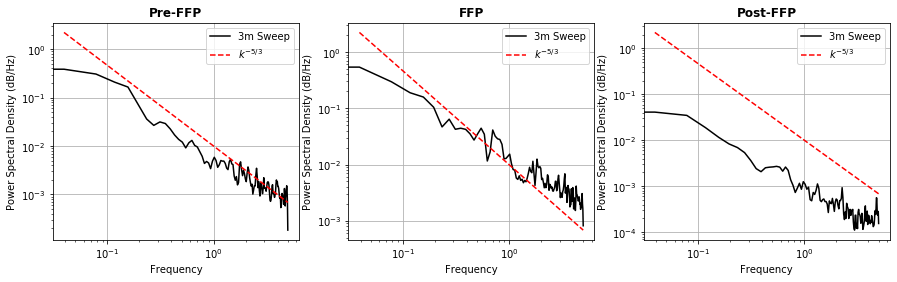

In [20]:
from spectrum import WelchPeriodogram
title = ['Pre-FFP', 'FFP', 'Post-FFP']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    s = WelchPeriodogram(data[i], sampling=10, detrend='mean', label='_nolegend_')
    Y = (np.array(s[0][1]) ** (-5/3))
    ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')
    plt.title(title[i], fontweight='bold')
    ax.legend(['3m Sweep', '$k^{-5/3}$'])